In [2]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders

# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william'

# UBUNTU
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_6_24hz'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/testes_emlsr'
# folder_path = r'/home/william/ns-3/ns-allinone-3.43/ns-3.43/testes_emlsr'
folder_path = r'/home/william/downloads/results_teste3'
# home\william\downloads\results_teste

banda_filter = 40
gi_filter = 800

files, folders = list_file_n_foldes(folder_path)

# print(files)
# print(folders)

columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs', 'STD']
all_data = pd.DataFrame(columns=columns)
# print(all_data)

for folder in folders:
    sim_files, sub_folders = list_file_n_foldes(folder)
    # for file_t in sim_files:
    #     print(f"sim_file: {file_t}")
    for i, file_t in enumerate(sim_files):
        print(f"arquivo: {i}")
        # PEGA DADOS DO TITULO DO ARQUIVO
        path_names = file_t.split('/')
        file_name = path_names[-1]
        simulation_title_parts = file_name.split('_')

        # standard = simulation_title_parts[0]
        # numSTAs = int(simulation_title_parts[-1].split('.')[0])
        # frequency = int(simulation_title_parts[1].replace('GHz', ''))
        # frequency2 = 0
        # frequency3 = 0
        # if 'GHz' in simulation_title_parts[2]:
        #     frequency2 = int(simulation_title_parts[2].replace('GHz', ''))
        # if len(simulation_title_parts) > 3 and 'GHz' in simulation_title_parts[3]:
        #     frequency3 = int(simulation_title_parts[3].replace('GHz', 
        
        # print('dados:', standard, numSTAs, frequency, frequency2, frequency3)

        standard = 'be'
        numSTAs = int(simulation_title_parts[-1].split('.')[0])
        frequency = int(simulation_title_parts[2].replace('GHz', ''))
        frequency2 = int(simulation_title_parts[3].replace('GHz', ''))
        frequency3 = int(simulation_title_parts[4].replace('GHz', ''))
        mlo_mode = simulation_title_parts[5]

        if (frequency == 2) : frequency = 2.4
        if (frequency2 == 2) : frequency2 = 2.4
        if (frequency3 == 2) : frequency3 = 2.4
        
        print(f'NOME : {simulation_title_parts}')
        print('dados:', standard, mlo_mode, numSTAs, frequency, frequency2, frequency3)
        # continue
        
        file_path = file_t
        print(f"file_path: {file_path}")

        # Ler o arquivo de texto
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # print(f"lines: {len(lines)}")

        # Processar as linhas para extrair as informações
        data = []
        for line in lines[1:]:  # Pular o cabeçalho

            if 'Command' in line or 'MCS' in line or 'ninja' in line or 'Process' in line:
                continue

            # print(line)
            # RETIRA AS UNIDADES DOS DADOS
            line = line.replace('Mbit/s', '')
            line = line.replace('MHz', '')
            line = line.replace('ns', '')
            # print(line)

            # Dividir a linha por tabulações ou múltiplos espaços
            parts = line.split()
            print('parts:', parts)

            if not (parts[0]).isdigit():
                 continue
            
            # # Adicionar os dados à lista
            mcs_value = int(parts[0])
            channel_width = int(parts[1])
            gi = int(parts[2])
            throughput = float(parts[3])

            # ADICIONA OS DADOS
            data.append([mcs_value, channel_width, gi, throughput, frequency, frequency2, frequency3, numSTAs, mlo_mode])

        # Criar um DataFrame a partir dos dados
        columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs', 'STD']
        df = pd.DataFrame(data, columns=columns)

        # print(df)
        all_data = pd.concat([all_data, df], ignore_index=True)

        # FILTRO
        # subset_complex = df[((df['Channel_width'] == banda_filter) & (df['GI'] == gi_filter))]

        # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
        # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
        tput = all_data['Throughput']
        # print(tput)

        # linha_data = {'Distance': dist, 'Throughput': tput.max()}

print("all_data")
print(all_data)

pd.options.mode.copy_on_write = True

all_data


arquivo: 0
NOME : ['Sim', '3', '6', '5', '0', 'emlsr', '10.out']
dados: be emlsr 10 6 5 0
file_path: /home/william/downloads/results_teste3/Simulations/Sim_3_6_5_0_emlsr_10.out
parts: ['0', '20', '3200', '12.0058']
parts: ['0', '20', '1600', '12.0092']
parts: ['0', '20', '800', '14.1109']
parts: ['0', '40', '3200', '24.057']
parts: ['0', '40', '1600', '24.0638']
parts: ['NS_ASSERT', 'failed,', 'cond="m_ptr",', 'msg="Attempted', 'to', 'dereference', 'zero', 'pointer",', '+1.030978000s', '10', 'file=/home/lance/william/3/-allinone-3.43/-3.43/src/core/model/ptr.h,', 'line=707']
parts: ['NS_FATAL,', 'terminating']
parts: ['terminate', 'called', 'without', 'an', 'active', 'exception']
parts: ['srun:', 'error:', 'nemesis:', 'task', '0:', 'Exited', 'with', 'exit', 'code', '250']
arquivo: 1
NOME : ['Sim', '1', '5', '0', '0', 'emlsr', '1.out']
dados: be emlsr 1 5 0 0
file_path: /home/william/downloads/results_teste3/Simulations/Sim_1_5_0_0_emlsr_1.out
parts: ['0', '20', '3200', '6.20144']
parts

,MCS,Channel_width,GI,Throughput,Frequency,Frequency2,Frequency3,numSTAs,STD
0,0,20,3200,12.0058,6,5,0,10,emlsr
1,0,20,1600,12.0092,6,5,0,10,emlsr
2,0,20,800,14.1109,6,5,0,10,emlsr
3,0,40,3200,24.0570,6,5,0,10,emlsr
4,0,40,1600,24.0638,6,5,0,10,emlsr
...,...,...,...,...,...,...,...,...,...
7099,13,20,1600,121.7330,2.4,0,0,5,emlsr
7100,13,20,800,141.7290,2.4,0,0,5,emlsr
7101,13,40,3200,229.7750,2.4,0,0,5,emlsr
7102,13,40,1600,229.7750,2.4,0,0,5,emlsr


In [3]:
# FILTRA OS CW ABAIXO DE 40
all_data = all_data[(all_data['Channel_width'] <= 40)]

all_data["CW_GI"] = all_data["Channel_width"].astype(str) +"_"+  all_data["GI"].astype(str)
all_data["F1_F2_F3"] = all_data["Frequency"].astype(str) +"_"+all_data["Frequency2"].astype(str)+"_"+all_data["Frequency3"].astype(str)

df_selected = all_data[['STD', 'F1_F2_F3', 'MCS' ,'CW_GI', 'numSTAs', 'Throughput']] 
# df_selected.plot()

df_selected = df_selected[df_selected['numSTAs'] == 1]
cw_gi = "40_800" 
df_selected = df_selected[df_selected['CW_GI'] == cw_gi]

df_selected

,STD,F1_F2_F3,MCS,CW_GI,numSTAs,Throughput
10,emlsr,5_0_0,0,40_800,1,14.6530
22,emlsr,5_0_0,1,40_800,1,29.6369
34,emlsr,5_0_0,2,40_800,1,44.4562
46,emlsr,5_0_0,3,40_800,1,59.6103
58,emlsr,5_0_0,4,40_800,1,89.0725
...,...,...,...,...,...,...
6836,str,5_6_0,9,40_800,1,375.4120
6848,str,5_6_0,10,40_800,1,418.7530
6860,str,5_6_0,11,40_800,1,457.5010
6872,str,5_6_0,12,40_800,1,490.0000


# Gerando dicionário de dados

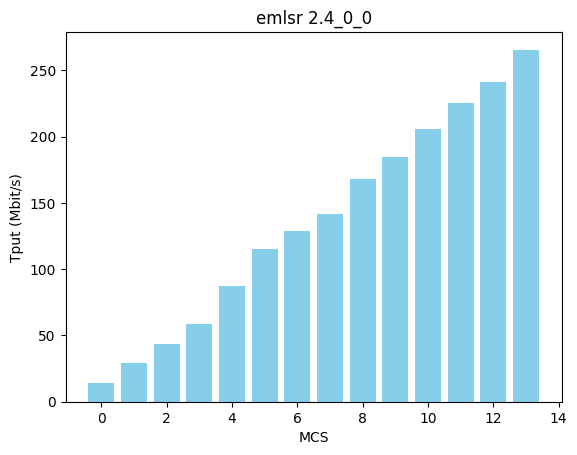

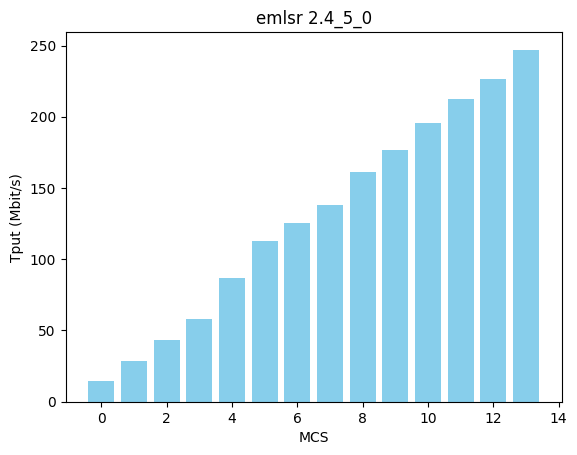

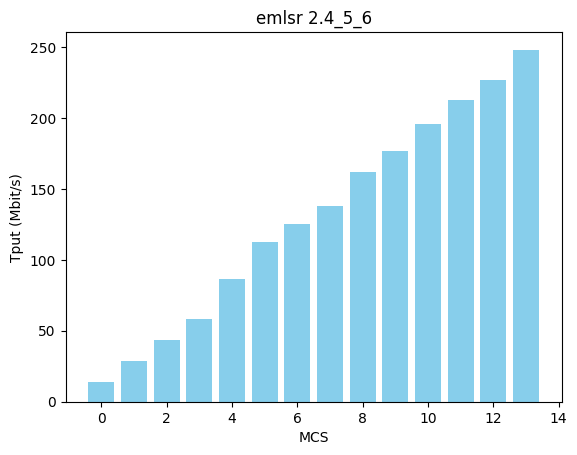

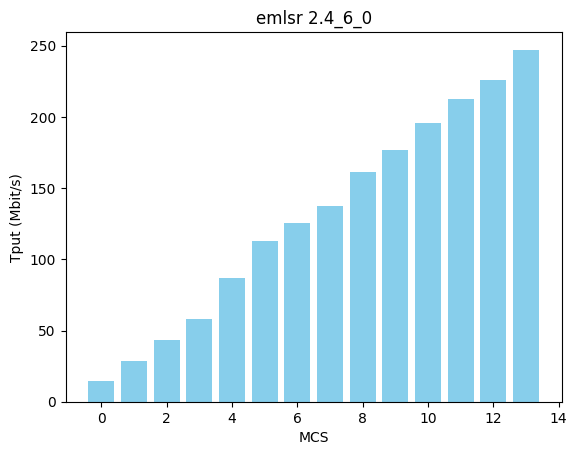

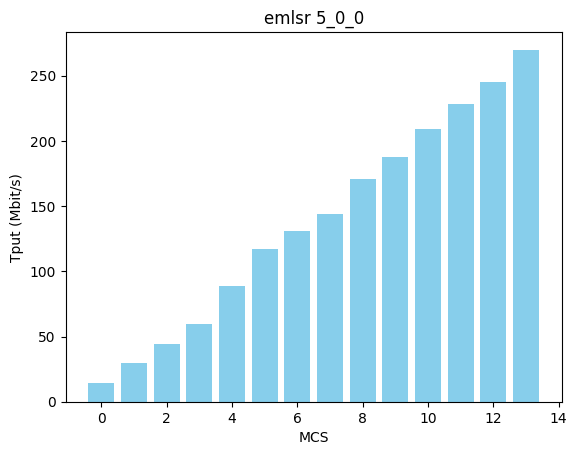

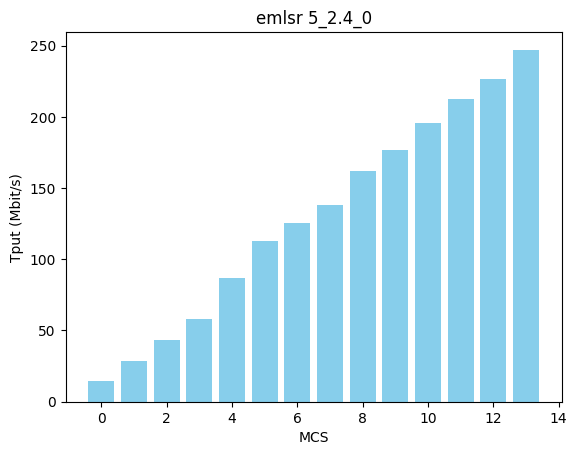

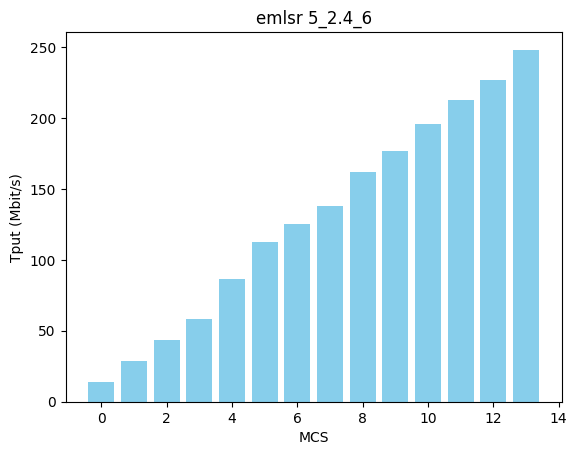

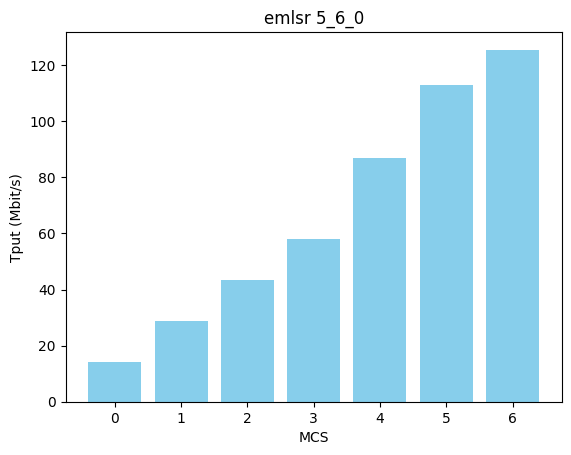

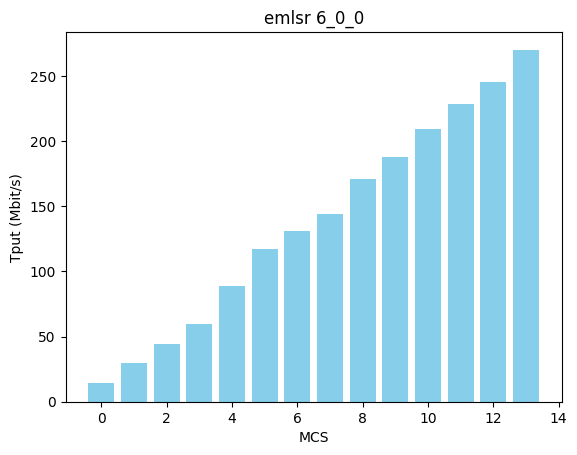

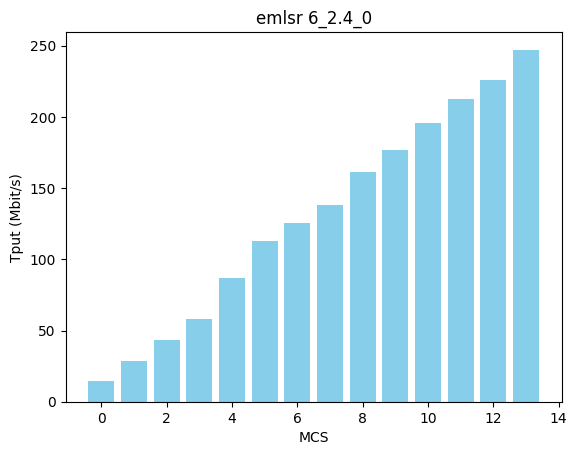

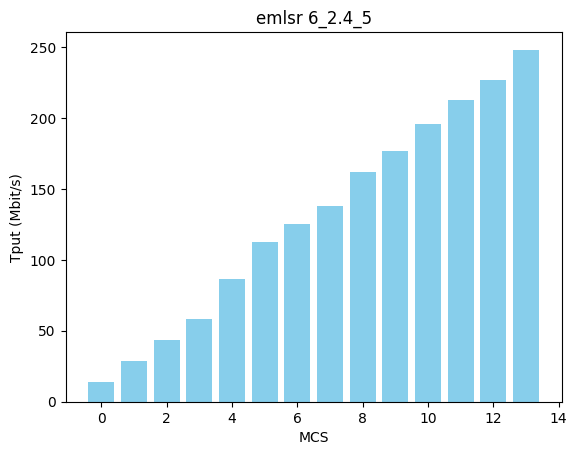

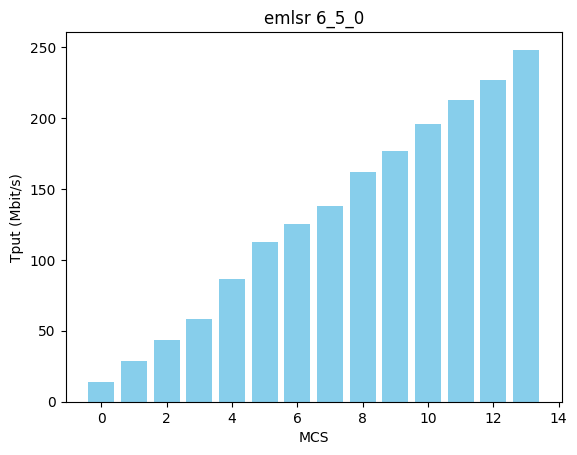

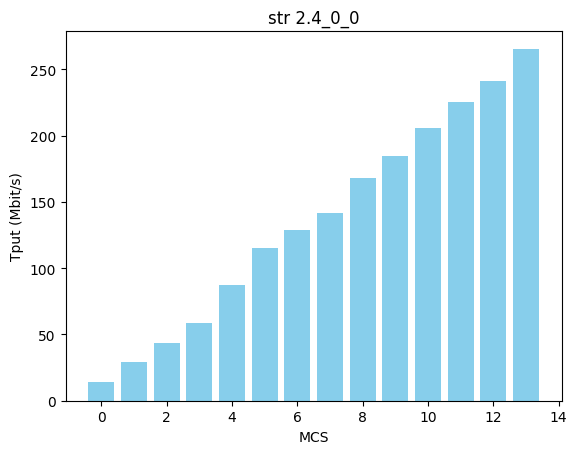

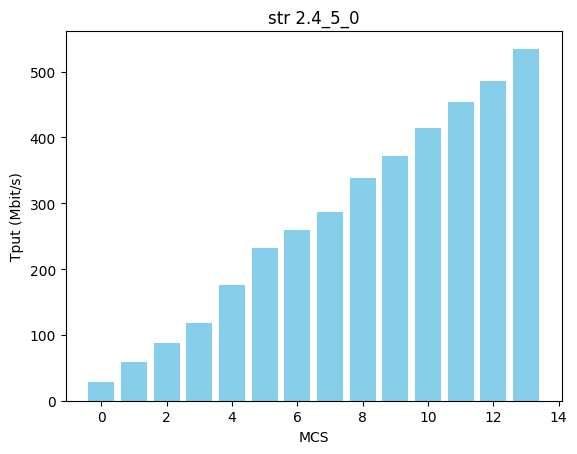

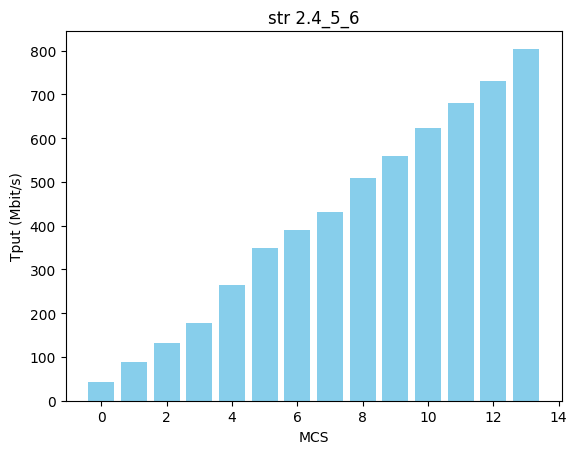

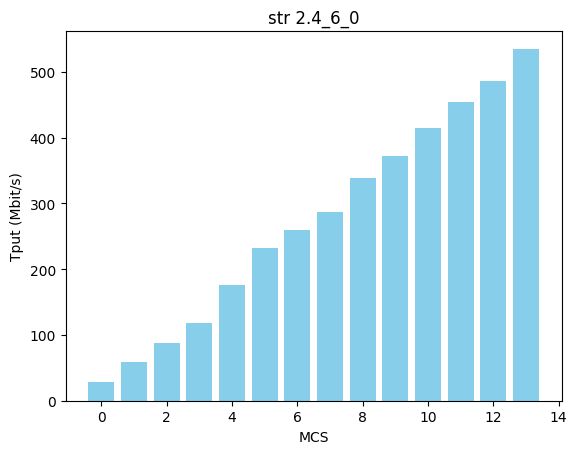

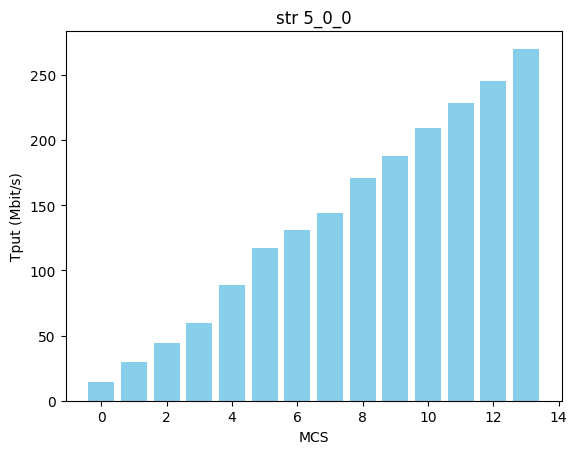

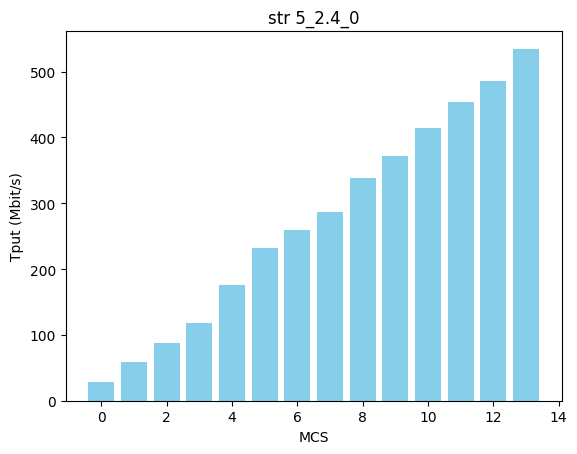

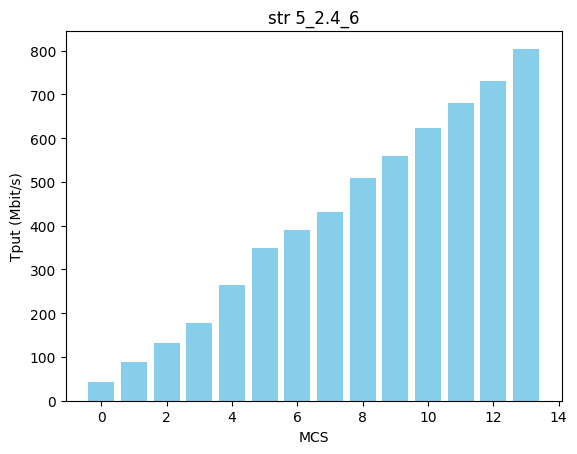

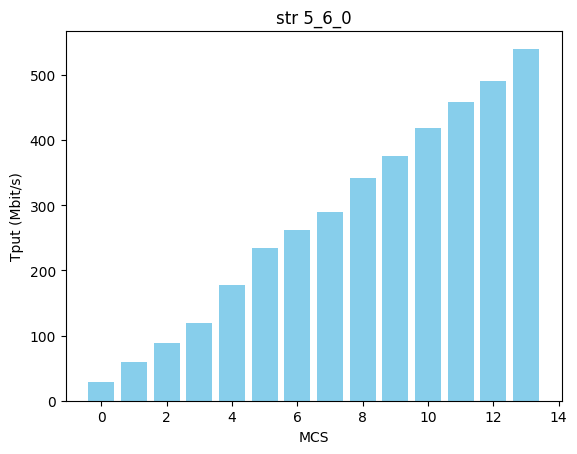

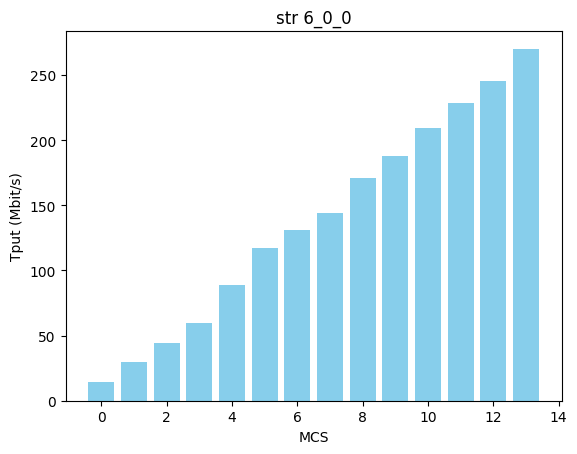

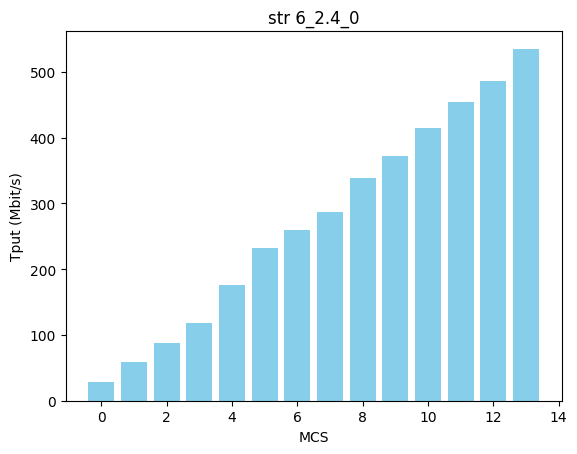

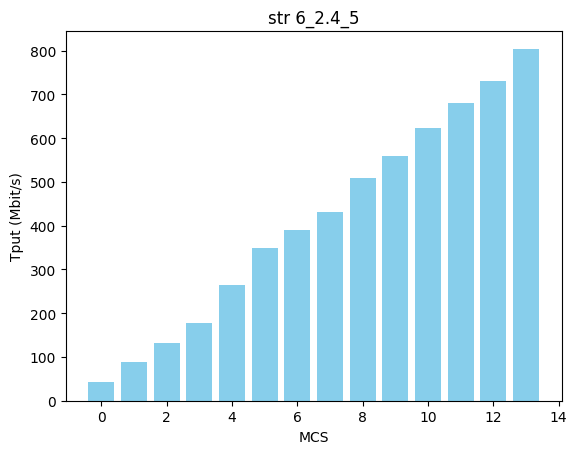

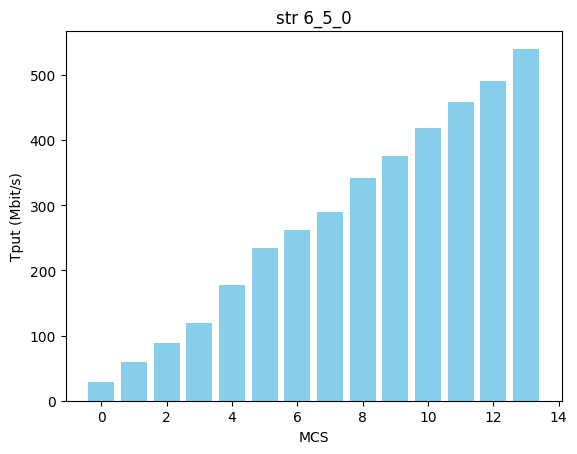

In [9]:
all_data["CW_GI"] = all_data["Channel_width"].astype(str) +"_"+  all_data["GI"].astype(str)
all_data["F1_F2_F3"] = all_data["Frequency"].astype(str) +"_"+all_data["Frequency2"].astype(str)+"_"+all_data["Frequency3"].astype(str)

df_selected = all_data[['STD', 'F1_F2_F3', 'MCS' ,'CW_GI', 'numSTAs', 'Throughput']] 
# df_selected.plot()

# FILTRA DADOS
numSTAs_test = 1
cw_gi = "40_800" 

df_selected = df_selected[df_selected['numSTAs'] == numSTAs_test]
df_selected = df_selected[df_selected['CW_GI'] == cw_gi]

df_selected

mlo_list = all_data['STD'].unique()
mlo_list = np.sort(mlo_list)
# print(mlo_list)


mcs_list = all_data['MCS'].unique()
mcs_list = np.sort(mcs_list)
# print(mcs_list)

freq_list = all_data['F1_F2_F3'].unique()
freq_list = np.sort(freq_list)
# print(freq_list)

lines_dict = {
    "modo": None,
    "links": None,
    "mcs": None,
    "tput_mean": None
}

list_lines_dict = []

for mlo in mlo_list:
    for freqs in freq_list:
        lines_dict = {
            "modo": None,
            "links": None,
            "mcs": None,
            "tput_mean": None
        }
        tput = []
        for mcs in mcs_list:
            # FILTRA OS DADOS SO DESSE ESCOPO
            df_filtered = df_selected[(df_selected['STD'] == mlo) & (df_selected['F1_F2_F3'] == freqs) & (df_selected['MCS'] == mcs)]
            pd.options.mode.copy_on_write = True
            faixa_mcs = df_filtered[(df_filtered['MCS'] == mcs)]
            mcs_tput =faixa_mcs['Throughput'].mean()
            # print(f"{mcs}: {mcs_tput}")
            tput.append(mcs_tput)

            # print(df_filtered)
            pass
        tput = np.array(tput)

         
        l1,l2,l3 = freqs.split('_')
        nlinks = 0
        if float(l1) != 0:
            nlinks += 1
        if float(l2) != 0:
            nlinks += 1
        if float(l3) != 0:
            nlinks += 1
        
        lines_dict = {
            "modo": mlo,
            "links": freqs,
            "nlinks": nlinks,
            "mcs": mcs_list,
            "tput_mean": tput
        }
        list_lines_dict.append(lines_dict)
        
        # Criando o gráfico de barras
        plt.bar(mcs_list, tput, color='skyblue')
        
        # Adicionando título e rótulos aos eixos
        plt.title(f'{mlo} {freqs}')
        plt.xlabel('MCS')
        plt.ylabel('Tput (Mbit/s)')
        
        # Exibindo o gráfico
        plt.show()


# tput = []
# for mcs in mcs_list:
#     faixa_mcs = df_selected[(df_selected['MCS'] == mcs)]
#     mcs_tput =faixa_mcs['Throughput'].mean()
#     # print(f"{mcs}: {mcs_tput}")
#     tput.append(mcs_tput)
# tput = np.array(tput)
# print(tput)

# # import matplotlib.pyplot as plt

# # Criando o gráfico de barras
# plt.bar(mcs_list, tput, color='skyblue')

# # Adicionando título e rótulos aos eixos
# plt.title('STR 5-0-0')
# plt.xlabel('MCS')
# plt.ylabel('Tput (Mbit/s)')

# # Exibindo o gráfico
# plt.show()






[{'modo': 'emlsr', 'links': '2.4_0_0', 'nlinks': 1, 'mcs': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype=object), 'tput_mean': array([ 14.4166,  29.1614,  43.7427,  58.6555,  87.6378, 114.986 ,
       128.494 , 141.968 , 168.043 , 184.532 , 205.853 , 224.961 ,
       240.967 , 265.522 ])}, {'modo': 'emlsr', 'links': '2.4_5_0', 'nlinks': 2, 'mcs': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype=object), 'tput_mean': array([ 14.1982,  28.8294,  43.3048,  58.0989,  86.716 , 112.756 ,
       125.397 , 137.785 , 161.568 , 176.481 , 195.46  , 212.251 ,
       226.182 , 247.054 ])}, {'modo': 'emlsr', 'links': '2.4_5_6', 'nlinks': 3, 'mcs': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype=object), 'tput_mean': array([ 14.2358,  28.8876,  43.3636,  58.1739,  86.8   , 112.847 ,
       125.523 , 137.798 , 161.902 , 176.823 , 195.962 , 212.797 ,
       226.733 , 248.021 ])}, {'modo': 'emlsr', 'links': '2.4_6_0', 'nlinks': 2, 'mcs': array([0, 1, 2, 3, 4, 5, 6, 7

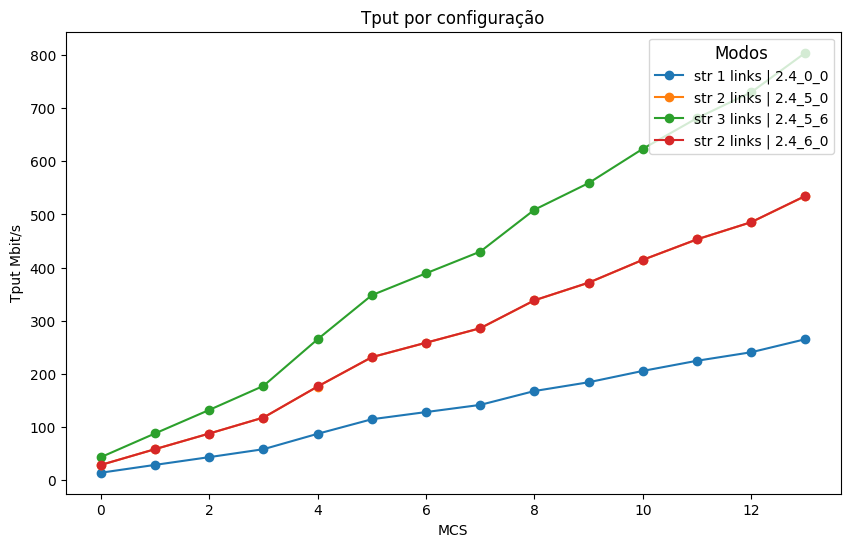

In [10]:
print(list_lines_dict)

plt.figure(figsize=(10, 6))  # 10 polegadas de largura e 6 polegadas de altura

for line_dict in list_lines_dict:
    modo = line_dict['modo']
    links = line_dict['links']
    
    l1,l2,l3 = links.split('_')
    num_links = 0
    if float(l1) != 0:
        num_links += 1
    if float(l2) != 0:
        num_links += 1
    if float(l3) != 0:
        num_links += 1
    # print(num_links,l1,l2,l3)

    if (l1 != "2.4"):
        continue
    # if (l1 != "2.4") and (l1 != "5") and (l1 != "6"):
    #     continue
    if modo != "str":
        continue
    # if modo != "emlsr":
    #     continue
    # if num_links != 2:
    #     continue
    
    if modo == 'str':
        linedraw = 'o-'
    elif modo == 'emlsr':
        linedraw = 'o:'
    else:
        linedraw = '-'
    
    plt.plot(line_dict["mcs"], line_dict["tput_mean"], linedraw, label=f"{modo} {num_links} links | {links}")
    
# Adicionando título e labels
plt.title('Tput por configuração')
plt.xlabel('MCS')
plt.ylabel('Tput Mbit/s')

# Adicionando legenda
plt.legend(title='Modos', title_fontsize=12, fontsize=10, loc='upper right')

# Mostrando o gráfico
plt.show()

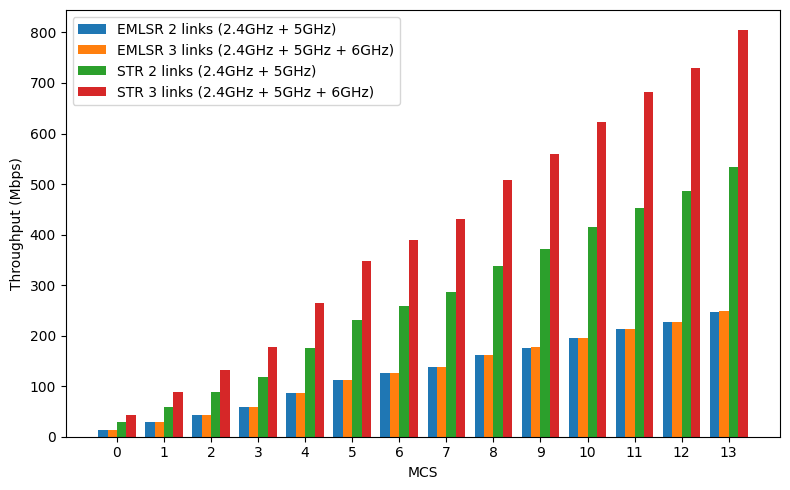

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# print(list_lines_dict)



# Dados (apenas 2 produtos)
produtos = ['Notebook', 'Smartphone']  # Removemos 'Tablet'
trimestres = ['Q1', 'Q2', 'Q3', 'Q4']

# Vendas por produto (apenas 2 entradas)
vendas = {
    
    'Smartphone': [200, 180, 220, 240],
    'Notebook': [120, 150, 130, 160],
}

produtos = []  # Removemos 'Tablet'
trimestres = []

# Vendas por produto (apenas 2 entradas)
vendas = {}

for line_dict in list_lines_dict:
    modo = line_dict['modo']
    links = line_dict['links']
    
    l1,l2,l3 = links.split('_')
    num_links = 0
    if float(l1) != 0:
        num_links += 1
    if float(l2) != 0:
        num_links += 1
    if float(l3) != 0:
        num_links += 1

     
    
    if num_links == 1 or l1 != "2.4":
        continue
    # if l1 != "2.4":
        
    
    cat_name = str(modo).upper() + " " + str(num_links) + " links"
    if num_links == 2:
        cat_name += " (2.4GHz + 5GHz)"
    elif num_links == 3:
        cat_name += " (2.4GHz + 5GHz + 6GHz)"
    if cat_name in produtos:
        continue
    
    trimestres = list(line_dict['mcs'])
    valores = line_dict['tput_mean']
    # print(cat_name)
    # print(trimestres)
    # print(valores)

    produtos.append(cat_name)
    vendas[cat_name] = valores
    

# Configuração
x = np.arange(len(trimestres))  # Posições: [0, 1, 2, 3]
largura = 0.20  # Aumentei a largura para 2 barras (ajuste visual)

# Plotar
fig, ax = plt.subplots(figsize=(8, 5))
for i, (produto, valores) in enumerate(vendas.items()):
    posicoes = x + (i * largura)  # Desloca cada barra
    ax.bar(posicoes, valores, largura, label=produto)

# Ajustes finais
# ax.set_title('Transmissão por MCS')
ax.set_xlabel('MCS')
ax.set_ylabel('Throughput (Mbps)')
ax.set_xticks(x + (largura * (len(produtos)-1)/2))  # Centraliza os rótulos entre as 2 barras
ax.set_xticklabels(trimestres)
ax.legend()

# # Adicionar rótulos nas barras (opcional)
# for barra in ax.containers:
#     ax.bar_label(barra, fmt='%d', padding=2)

plt.tight_layout()
# plt.savefig(f"tput_MCS_{numSTAs_test}.svg", format='svg')
plt.show()


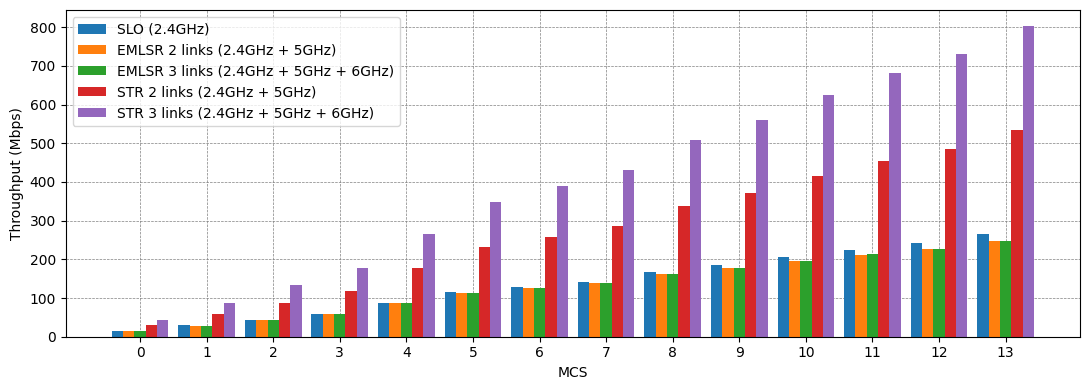

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# print(list_lines_dict)



# Dados (apenas 2 produtos)
produtos = ['Notebook', 'Smartphone']  # Removemos 'Tablet'
trimestres = ['Q1', 'Q2', 'Q3', 'Q4']

# Vendas por produto (apenas 2 entradas)
vendas = {
    
    'Smartphone': [200, 180, 220, 240],
    'Notebook': [120, 150, 130, 160],
}

produtos = []  # Removemos 'Tablet'
trimestres = []

# Vendas por produto (apenas 2 entradas)
vendas = {}

for line_dict in list_lines_dict:
    modo = line_dict['modo']
    links = line_dict['links']
    
    l1,l2,l3 = links.split('_')
    num_links = 0
    if float(l1) != 0:
        num_links += 1
    if float(l2) != 0:
        num_links += 1
    if float(l3) != 0:
        num_links += 1

     
    
    # if num_links == 1 or l1 != "2.4":
    if l1 != "2.4":
        continue
    # if l1 != "2.4":
        
    
    cat_name = str(modo).upper() + " " + str(num_links) + " links"
    if num_links == 2:
        cat_name += " (2.4GHz + 5GHz)"
    elif num_links == 3:
        cat_name += " (2.4GHz + 5GHz + 6GHz)"
    elif num_links == 1:
        cat_name = "SLO (2.4GHz)"
    if cat_name in produtos:
        continue
    
    trimestres = list(line_dict['mcs'])
    valores = line_dict['tput_mean']
    # print(cat_name)
    # print(trimestres)
    # print(valores)

    produtos.append(cat_name)
    vendas[cat_name] = valores
    

# Configuração
x = np.arange(len(trimestres))  # Posições: [0, 1, 2, 3]
largura = 0.17  # Aumentei a largura para 2 barras (ajuste visual)

# Plotar
fig, ax = plt.subplots(figsize=(11, 4))

plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().set_axisbelow(True)

for i, (produto, valores) in enumerate(vendas.items()):
    posicoes = x + (i * largura)  # Desloca cada barra
    ax.bar(posicoes, valores, largura, label=produto)

# Ajustes finais
# ax.set_title('Transmissão por MCS')
ax.set_xlabel('MCS')
ax.set_ylabel('Throughput (Mbps)')
ax.set_xticks(x + (largura * (len(produtos)-1)/2))  # Centraliza os rótulos entre as 2 barras
ax.set_xticklabels(trimestres)
ax.legend()

# # Adicionar rótulos nas barras (opcional)
# for barra in ax.containers:
#     ax.bar_label(barra, fmt='%d', padding=2)

plt.tight_layout()
# plt.savefig(f"tput_MCS_large_{numSTAs_test}.svg", format='svg')

plt.show()


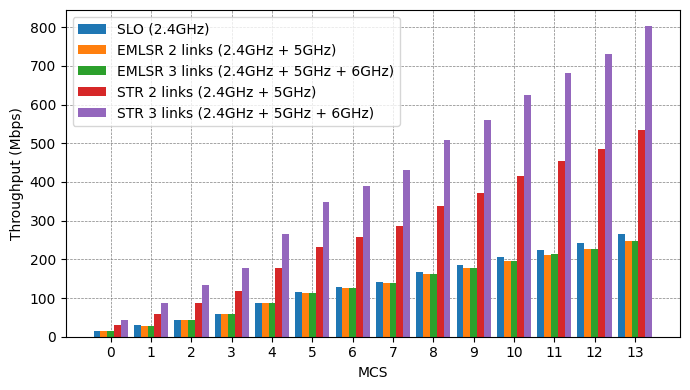

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# print(list_lines_dict)



# Dados (apenas 2 produtos)
produtos = ['Notebook', 'Smartphone']  # Removemos 'Tablet'
trimestres = ['Q1', 'Q2', 'Q3', 'Q4']

# Vendas por produto (apenas 2 entradas)
vendas = {
    
    'Smartphone': [200, 180, 220, 240],
    'Notebook': [120, 150, 130, 160],
}

produtos = []  # Removemos 'Tablet'
trimestres = []

# Vendas por produto (apenas 2 entradas)
vendas = {}

for line_dict in list_lines_dict:
    modo = line_dict['modo']
    links = line_dict['links']
    
    l1,l2,l3 = links.split('_')
    num_links = 0
    if float(l1) != 0:
        num_links += 1
    if float(l2) != 0:
        num_links += 1
    if float(l3) != 0:
        num_links += 1

     
    
    # if num_links == 1 or l1 != "2.4":
    if l1 != "2.4":
        continue
    # if l1 != "2.4":
        
    
    cat_name = str(modo).upper() + " " + str(num_links) + " links"
    if num_links == 2:
        cat_name += " (2.4GHz + 5GHz)"
    elif num_links == 3:
        cat_name += " (2.4GHz + 5GHz + 6GHz)"
    elif num_links == 1:
        cat_name = "SLO (2.4GHz)"
    if cat_name in produtos:
        continue
    
    trimestres = list(line_dict['mcs'])
    valores = line_dict['tput_mean']
    # print(cat_name)
    # print(trimestres)
    # print(valores)

    produtos.append(cat_name)
    vendas[cat_name] = valores
    

# Configuração
x = np.arange(len(trimestres))  # Posições: [0, 1, 2, 3]
largura = 0.17  # Aumentei a largura para 2 barras (ajuste visual)

# Plotar
fig, ax = plt.subplots(figsize=(7, 4))

plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().set_axisbelow(True)

for i, (produto, valores) in enumerate(vendas.items()):
    posicoes = x + (i * largura)  # Desloca cada barra
    ax.bar(posicoes, valores, largura, label=produto)

# Ajustes finais
# ax.set_title('Transmissão por MCS')
ax.set_xlabel('MCS')
ax.set_ylabel('Throughput (Mbps)')
ax.set_xticks(x + (largura * (len(produtos)-1)/2))  # Centraliza os rótulos entre as 2 barras
ax.set_xticklabels(trimestres)
ax.legend()

# # Adicionar rótulos nas barras (opcional)
# for barra in ax.containers:
#     ax.bar_label(barra, fmt='%d', padding=2)

plt.tight_layout()
plt.savefig(f"tput_MCS_large_{numSTAs_test}.svg", format='svg')
# plt.savefig(f"tput_MCS_large_all_sims.svg", format='svg')

plt.show()
